# Portfolio Construction and Analysis -- Execution using IBKR API
## Objectives
1. Select some assets based on their historical performances as portfolio.
2. Execute the trades using IBKR API

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import sys
sys.path.insert(0, r'C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\python_files')
import functions_1 as fnc
from ib_insync import *
util.startLoop()

## Assets
First I will select the assets I want in my portfolio, this will be done manually although there can be advanced methods of doing this but right now I don't know how to do it and it's not my goal too, so I will first select a bunchg of ETFs from Yahoo Finance and then check their previous performances and run a backtest too, then I will execute the suitable portfolio weights in a simulated IBKR account which currently has $1000000 balance in it. I will rebalnce this portfolio on quarterly basis. This is the first portfolio I am running a forward test in but as I learn more and gather more knowlege and ideas I will do some much more advanced type of long term portfolio executions.

So far I have developed all the tools I need in order to analyze a portfolio but now comes the main part which is deciding and then actually executing my ideas.

In [2]:
tickers = ['USRT',  'VNQ', 'IAU', 'VGLT', 'EMB', 'VONG', 'IXUS', 'VCSH', 'VTIP', 'VCIT', 'TLT', 'BNDX', 'QQQ', 'BND', 'VXUS']
r_d_all = fnc.get_returns_data(tickers=tickers, replace_tickers=None, interval='1d', index_freq='d')

C:\Users\user\Documents\GitHub\Portfolio-Construction-and-Analysis\python_files\functions_1.py:85: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  result_df.index = result_df.index.to_period(index_freq)


In [3]:
r_d_all

,USRT,VNQ,IAU,VGLT,EMB,VONG,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS
Date,,,,,,,,,,,,,,,
1999-03-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004896,NaN,NaN
1999-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.024361,NaN,NaN
1999-03-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028714,NaN,NaN
1999-03-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008495,NaN,NaN
1999-03-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007221,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-01-10,0.002447,0.000686,-0.002084,-0.003480,0.003696,0.009310,0.002581,0.000389,0.000000,-0.000572,-0.002629,-0.001120,0.006465,-0.001141,0.003256
2024-01-11,-0.005981,-0.005555,0.001828,0.004055,0.004692,0.002156,0.000368,0.002334,0.002385,0.003518,0.003163,0.003365,0.001985,0.003339,0.000390
2024-01-12,0.004544,0.003586,0.009904,-0.000112,0.000946,0.000837,0.002942,0.001746,0.002379,0.001957,-0.001109,0.000000,0.000490,0.001313,0.002596


In [4]:
r_d_all.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 6254 entries, 1999-03-11 to 2024-01-17
Freq: D
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   USRT    4204 non-null   float64
 1   VNQ     4857 non-null   float64
 2   IAU     4773 non-null   float64
 3   VGLT    3532 non-null   float64
 4   EMB     4045 non-null   float64
 5   VONG    3351 non-null   float64
 6   IXUS    2823 non-null   float64
 7   VCSH    3559 non-null   float64
 8   VTIP    2829 non-null   float64
 9   VCIT    3559 non-null   float64
 10  TLT     5403 non-null   float64
 11  BNDX    2673 non-null   float64
 12  QQQ     6254 non-null   float64
 13  BND     4222 non-null   float64
 14  VXUS    3262 non-null   float64
dtypes: float64(15)
memory usage: 781.8 KB


In [5]:
fnc.start_dates(r_d_all)

{'QQQ': Period('1999-03-11', 'D'),
 'TLT': Period('2002-07-31', 'D'),
 'VNQ': Period('2004-09-30', 'D'),
 'IAU': Period('2005-01-31', 'D'),
 'BND': Period('2007-04-11', 'D'),
 'USRT': Period('2007-05-07', 'D'),
 'EMB': Period('2007-12-20', 'D'),
 'VCSH': Period('2009-11-24', 'D'),
 'VCIT': Period('2009-11-24', 'D'),
 'VGLT': Period('2010-01-05', 'D'),
 'VONG': Period('2010-09-23', 'D'),
 'VXUS': Period('2011-01-31', 'D'),
 'VTIP': Period('2012-10-17', 'D'),
 'IXUS': Period('2012-10-25', 'D'),
 'BNDX': Period('2013-06-05', 'D')}

In [6]:
r_d = r_d_all.dropna()

<Axes: title={'center': 'Annualized Returns'}>

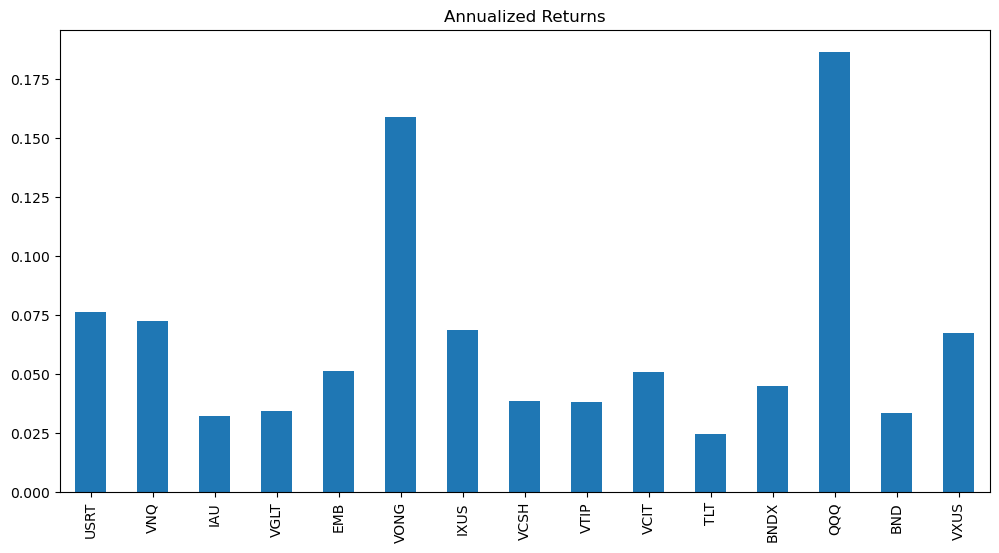

In [7]:
annu_r = fnc.annualize_returns(r_d, 252)
annu_r.plot.bar(title= 'Annualized Returns', figsize=(12, 6))

<Axes: title={'center': 'Annualized Volatility'}>

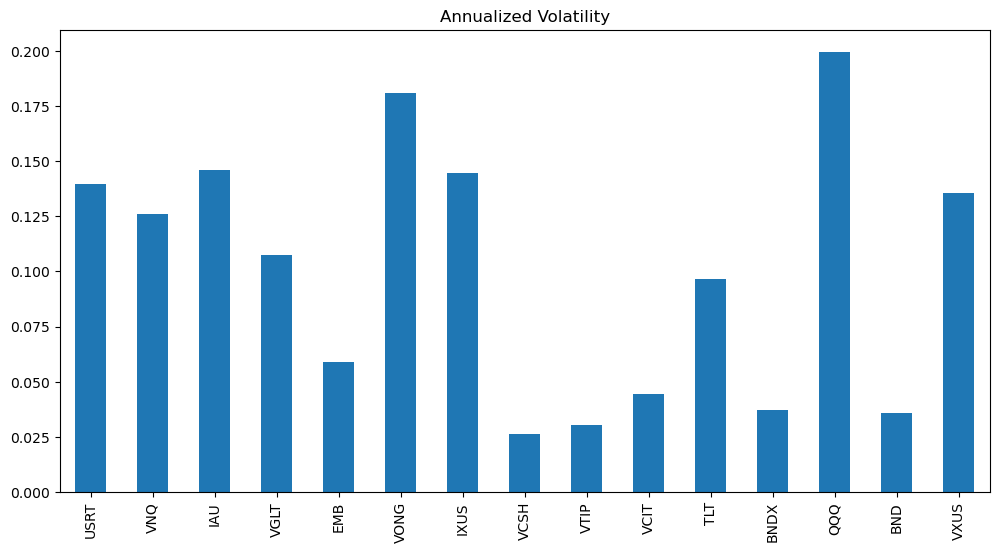

In [8]:
fnc.annualize_vol(r_d, 252).plot.bar(title= 'Annualized Volatility', figsize=(12, 6))

In [9]:
import seaborn as sns

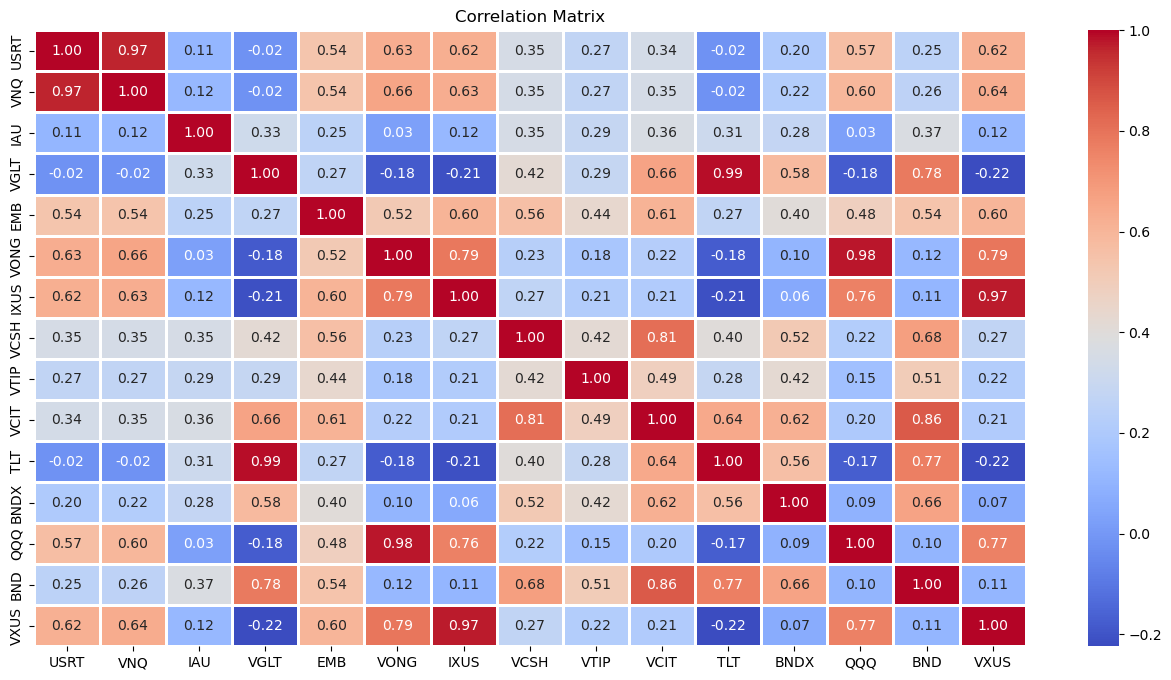

In [10]:
corr = r_d.corr()
plt.figure(figsize=(16, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.9)
plt.title('Correlation Matrix')
plt.show()

In [35]:
r_d.corr().describe()

,USRT,VNQ,IAU,VGLT,EMB,VONG,IXUS,VCSH,VTIP,VCIT,TLT,BNDX,QQQ,BND,VXUS
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.428741,0.436766,0.270632,0.298926,0.509356,0.392738,0.395549,0.456632,0.362269,0.505689,0.293575,0.386515,0.373210,0.474268,0.395763
std,0.315039,0.316627,0.235501,0.433023,0.183424,0.398091,0.399683,0.224175,0.208769,0.261092,0.428501,0.272792,0.390772,0.308019,0.401479
min,-0.020071,-0.019716,0.028078,-0.223899,0.252800,-0.181190,-0.213288,0.218101,0.153350,0.200808,-0.221389,0.060779,-0.176761,0.101767,-0.223899
25%,0.226517,0.237025,0.117679,-0.098243,0.420377,0.111052,0.113909,0.308614,0.244354,0.281887,-0.097206,0.152310,0.097626,0.185259,0.113191
50%,0.350539,0.348034,0.278904,0.287514,0.540404,0.233312,0.265989,0.399394,0.287304,0.487684,0.283933,0.404259,0.218101,0.506383,0.270029
75%,0.622702,0.634086,0.339280,0.621645,0.581197,0.723760,0.696331,0.541157,0.429882,0.653067,0.603406,0.571984,0.679545,0.722357,0.700873
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Portfolio Selection
Now that we have got assets that we want to buy let's analyze which portfolio weighting scheme will be most suitable for us.

<Axes: xlabel='Volatility'>

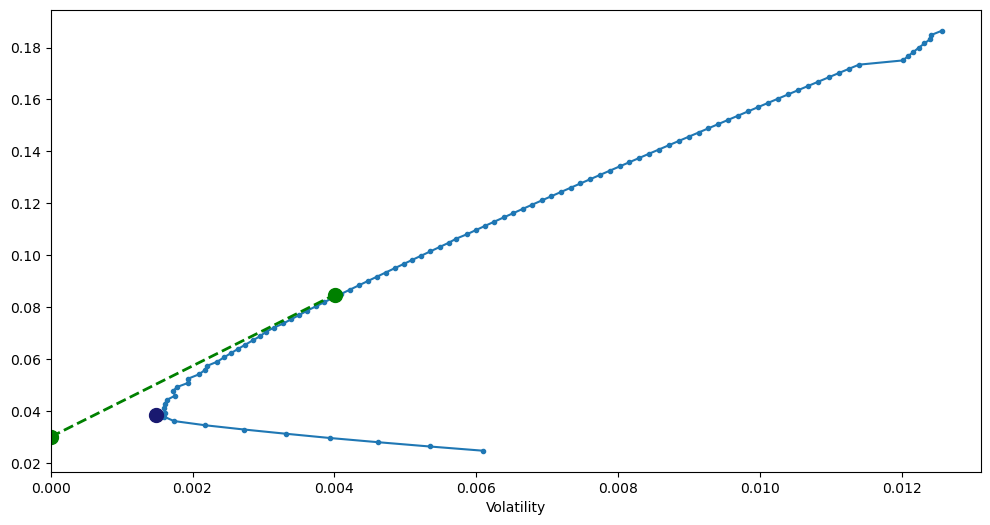

In [11]:
cov = r_d.cov()
fnc.plot_ef(100, annu_r, cov, show_gmv=True, show_msr=True, riskfree_rate=0.03)

## Backtests
Backtest and analyze the results of backtesting results of different types of portfolios

In [63]:
target_rets = [0.06, 0.08]
backtest = fnc.combined_backtesting_result(r_d_all.dropna(), portfolios=['GMV', 'MSR', 'EW', 'TR'], periods_per_year=252, starting_balance=1000, starting_step=90,
                                            rolling_period=90, reweight_period=90, weights_column=True, max_asset_weight=0.25, riskfree_rate=0.03,
                                              target_returns=target_rets)

In [64]:
backtest

Global Minimum Variance                                          \
                           Returns Account History  Drawdown Previous Peak   
Date                                                                         
2013-10-11               -0.000679      999.321471 -0.000679   1000.000000   
2013-10-14               -0.000100      999.221049 -0.000779   1000.000000   
2013-10-15               -0.000352      998.868952 -0.001131   1000.000000   
2013-10-16                0.002316     1001.182054  0.000000   1001.182054   
2013-10-17                0.000847     1002.030308  0.000000   1002.030308   
...                            ...             ...       ...           ...   
2024-01-10               -0.000427       1469.7716 -0.006205   1478.948069   
2024-01-11                0.002662     1473.684791 -0.003559   1478.948069   
2024-01-12                0.001409     1475.761671 -0.002155   1478.948069   
2024-01-16               -0.003070     1471.231635 -0.005218   1478.948069   
2024-01-17               -0.001847     1468.513697 -0.007055   1478.948069   

                                                               \
                                                      Weights   
Date                                                            
2013-10-11  {'USRT': 0.0, 'VNQ': 0.0, 'IAU': 0.0, 'VGLT': ...   
2013-10-14  {'USRT': 0.0, 'VNQ': 0.0, 'IAU': 0.0, 'VGLT': ...   
2013-10-15  {'USRT': 0.0, 'VNQ': 0.0, 'IAU': 0.0, 'VGLT': ...   
2013-10-16  {'USRT': 0.0, 'VNQ': 0.0, 'IAU': 0.0, 'VGLT': ...   
2013-10-17  {'USRT': 0.0, 'VNQ': 0.0, 'IAU': 0.0, 'VGLT': ...   
...                                                       ...   
2024-01-10  {'USRT': 4.180461669725828e-09, 'VNQ': 0.02159...   
2024-01-11  {'USRT': 4.180461669725828e-09, 'VNQ': 0.02159...   
2024-01-12  {'USRT': 4.180461669725828e-09, 'VNQ': 0.02159...   
2024-01-16  {'USRT': 4.180461669725828e-09, 'VNQ': 0.02159...   
2024-01-17  {'USRT': 4.180461669725828e-09, 'VNQ': 0.02159...   

           Maximum Sharpe Ratio                                          \
                        Returns Account History  Drawdown Previous Peak   
Date                                                                      
2013-10-11             0.005323      1005.32262  0.000000   1005.322620   
2013-10-14             0.003647     1008.988574  0.000000   1008.988574   
2013-10-15            -0.003917     1005.036544 -0.003917   1008.988574   
2013-10-16             0.009160     1014.242294  0.000000   1014.242294   
2013-10-17             0.007256     1021.601393  0.000000   1021.601393   
...                         ...             ...       ...           ...   
2024-01-10             0.004041      2156.47627 -0.002233   2161.301687   
2024-01-11             0.002215     2161.253085 -0.000022   2161.301687   
2024-01-12             0.001363     2164.198807  0.000000   2164.198807   
2024-01-16            -0.001297     2161.392753 -0.001297   2164.198807   
2024-01-17            -0.004378     2151.929811 -0.005669   2164.198807   

                                                               ...  \
                                                      Weights  ...   
Date                                                           ...   
2013-10-11  {'USRT': 2.8507035824191715e-12, 'VNQ': 2.3656...  ...   
2013-10-14  {'USRT': 2.8507035824191715e-12, 'VNQ': 2.3656...  ...   
2013-10-15  {'USRT': 2.8507035824191715e-12, 'VNQ': 2.3656...  ...   
2013-10-16  {'USRT': 2.8507035824191715e-12, 'VNQ': 2.3656...  ...   
2013-10-17  {'USRT': 2.8507035824191715e-12, 'VNQ': 2.3656...  ...   
...                                                       ...  ...   
2024-01-10  {'USRT': 1.1988625611143193e-12, 'VNQ': 1.2760...  ...   
2024-01-11  {'USRT': 1.1988625611143193e-12, 'VNQ': 1.2760...  ...   
2024-01-12  {'USRT': 1.1988625611143193e-12, 'VNQ': 1.2760...  ...   
2024-01-16  {'USRT': 1.1988625611143193e-12, 'VNQ': 1.2760...  ...   
2024-01-17  {'USRT': 1.1988625611143193e-12, '

In [65]:
rets = backtest.xs('Returns', level=1, axis=1)
hist = backtest.xs('Account History', level=1, axis=1)
weights = backtest.xs('Weights', level=1, axis=1)
drawdown = backtest.xs('Drawdown', level=1, axis=1)
prev_peak = backtest.xs('Previous Peak', level=1, axis=1)

In [66]:
fnc.summary_stats(rets, periods_per_year=252)

,Annualized Returns,Annualized Vol,Skewness,Kurtosis,Cornish-Fisher VaR (5%),Historic Cvar (5%),Sharpe Ratio,Max Drawdown,Time Period
Global Minimum Variance,0.038199,0.028519,-1.546560,38.797275,0.002215,0.003860,1.339452,-0.083593,<-3750 * Days>
Maximum Sharpe Ratio,0.077633,0.069415,-0.246486,11.533264,0.006433,0.010699,1.118399,-0.147696,<-3750 * Days>
Equally Weighted,0.070336,0.064652,-1.030245,18.676964,0.006243,0.009430,1.087905,-0.166397,<-3750 * Days>
Target Returns 6.0%,0.052449,0.064189,-1.337512,30.918582,0.005562,0.009786,0.817112,-0.144333,<-3750 * Days>
Target Returns 8.0%,0.051400,0.077749,-3.473997,76.199394,0.004335,0.011242,0.661104,-0.213357,<-3750 * Days>


<Axes: xlabel='Date'>

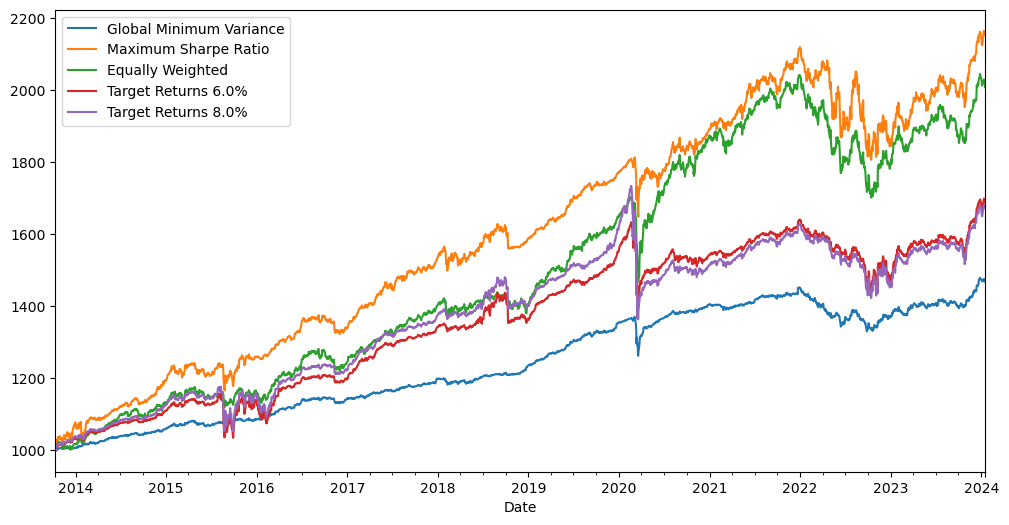

In [67]:
hist.plot(figsize=(12, 6))